In [10]:
import numpy as np
from matplotlib import *
from matplotlib import pyplot as pp
from mpmath import *
mp.dps = 15; mp.pretty = True

from scipy import optimize as opt

import sympy
from sympy.matrices.matrices import *
from scipy.sparse import diags
from scipy.linalg import eigvals as eigenvals

from scipy import sparse as sp
from scipy.sparse import coo_matrix as cmm

In [1]:
def besselext(z):
    return besselj(0,z)+1j*struveh(0,z)
def bessextsym(z):
    return besselext(z)+besselext(np.conj(z))

In [ ]:
cplot(lambda z: besselj(0,z)+besselj(0,np.conj(z)),[-15,15],[-8,8],points=10000)

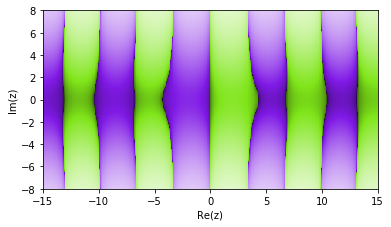

In [12]:
cplot(lambda z: 1j*struveh(0,z)+1j*struveh(0,np.conj(z)),[-15,15],[-8,8],points=100000)

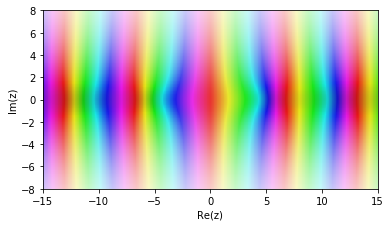

In [16]:
cplot(lambda z: besselext(z)+besselext(np.conj(z)),[-15,15],[-8,8],points=100000)

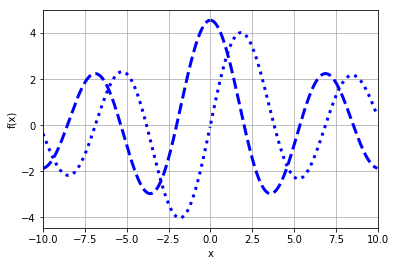

In [4]:
plot(lambda x: bessextsym(x+2*1j),[-10,10],points=1000)

In [5]:
bessextsym(10+0.1*1j)

(-0.494376418213349 + 0.23778302024111j)

In [ ]:
 cplot(lambda z: besselj(1,z)+besselj(1,np.conj(z)),[-15,15],[-8,8],points=100000)

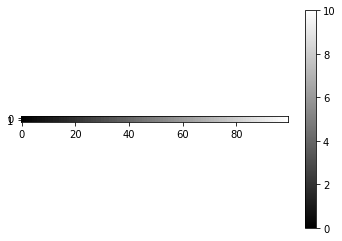

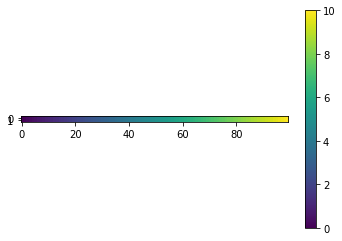

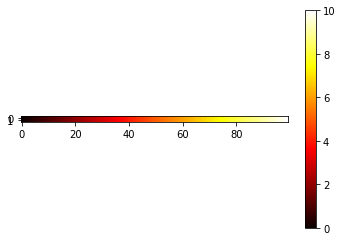

In [7]:
test2dplot=[np.linspace(0,10,100),np.linspace(0,10,100)]
pp.figure()
pp.imshow(test2dplot,cmap='gray')
pp.colorbar()
pp.figure()
pp.imshow(test2dplot,cmap='viridis')
pp.colorbar()
pp.figure()
pp.imshow(test2dplot,cmap='hot')
pp.colorbar()

In [27]:
matr=np.ndarray.tolist(np.arange(16).reshape((4,4)))
print(matr)

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]


In [28]:
matr[2:3]=[]

In [29]:
print(np.asarray(matr))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [12 13 14 15]]


In [30]:
for i in range(len(matr)):
    matr[i][2:3]=[]

In [31]:
print(np.asarray(matr))

[[ 0  1  3]
 [ 4  5  7]
 [12 13 15]]


In [8]:
def adjMat(matr,row,col):
    # row and col begin in 1
    # matr    should be an array, not a list
    #returns an array
    row-=1
    col-=1
    adj=np.ndarray.tolist(matr)
    adj[row:row+1]=[]
    for i in range(len(adj)):
        adj[i][col:col+1]=[]
    return np.asarray(adj)

In [60]:
print(adjMat(np.arange(16).reshape((4,4)),2,2))

[[ 0  1  3]
 [ 4  5  7]
 [12 13 15]]


In [10]:
from sympy import *

In [11]:
B,mu,t,tp,x,Del,Dels=symbols('B,m,t,tp,x,D,Ds')

In [503]:
gE,g11e,g11h,g1Ne,g1Nh,En=symbols('gE,g11e,g11h,g1Ne,g1Nh,En')

In [515]:
#matr=np.asarray([[B+mu,0,t,0,0,0,0,0,tp,0],[0,B-mu,0,-t,0,0,0,0,0,-tp],[t,0,B+mu,0,t,0,0,0,0,0],\
#                 [0,-t,0,B-mu,0,-t,0,0,0,0],[0,0,t,0,B+mu,0,tp,0,0,0],[0,0,0,-t,0,B-mu,0,-tp,0,0],[0,0,0,0,tp,0,x,Dels,0,0],\
#                [0,0,0,0,0,-tp,Del,-x,0,0],[tp,0,0,0,0,0,0,0,x,Del],[0,-tp,0,0,0,0,0,0,Dels,-x]])
matr=np.asarray([[1+gE*g11e*En,-gE*g11e*Del,gE*g1Ne*En,-gE*g1Ne*Dels],[gE*g11h*Dels,1-gE*g11h*En,gE*g1Nh*Del,-gE*g1Nh*En],\
                [gE*g1Ne*En,-gE*g1Ne*Del,1+gE*g11e*En,-gE*g11e*Dels],[gE*g1Nh*Dels,-gE*g1Nh*En,gE*g11h*Del,1-gE*g11h*En]])
print(matr)

[[En*g11e*gE + 1 -D*g11e*gE En*g1Ne*gE -Ds*g1Ne*gE]
 [Ds*g11h*gE -En*g11h*gE + 1 D*g1Nh*gE -En*g1Nh*gE]
 [En*g1Ne*gE -D*g1Ne*gE En*g11e*gE + 1 -Ds*g11e*gE]
 [Ds*g1Nh*gE -En*g1Nh*gE D*g11h*gE -En*g11h*gE + 1]]


In [94]:
print(adjMat(adjMat(matr,3,3),3,3))

[[B + m 0 0 0 0 0 tp 0]
 [0 B - m 0 0 0 0 0 -tp]
 [0 0 B + m 0 tp 0 0 0]
 [0 0 0 B - m 0 -tp 0 0]
 [0 0 tp 0 x Ds 0 0]
 [0 0 0 -tp D -x 0 0]
 [tp 0 0 0 0 0 x D]
 [0 -tp 0 0 0 0 Ds -x]]


In [516]:
nn=len(matr)
A = Matrix(nn, nn, symbols('A:{}:{}'.format(nn,nn)))
detA=A.det()
mat=np.asarray(matr).reshape(nn**2)
newDet=detA.subs(zip(list(A),mat))
print(simplify(newDet))

D**2*Ds**2*g11e**2*g11h**2*gE**4 - D**2*Ds**2*g11e**2*g1Nh**2*gE**4 - D**2*Ds**2*g11h**2*g1Ne**2*gE**4 + D**2*Ds**2*g1Ne**2*g1Nh**2*gE**4 + D**2*g1Ne*g1Nh*gE**2 - 2*D*Ds*En**2*g11e**2*g11h**2*gE**4 + 2*D*Ds*En**2*g11e**2*g1Nh**2*gE**4 + 2*D*Ds*En**2*g11h**2*g1Ne**2*gE**4 - 2*D*Ds*En**2*g1Ne**2*g1Nh**2*gE**4 + 2*D*Ds*En*g11e**2*g11h*gE**3 - 2*D*Ds*En*g11e*g11h**2*gE**3 + 2*D*Ds*En*g11e*g1Nh**2*gE**3 - 2*D*Ds*En*g11h*g1Ne**2*gE**3 + 2*D*Ds*g11e*g11h*gE**2 + Ds**2*g1Ne*g1Nh*gE**2 + En**4*g1Ne**2*g1Nh**2*gE**4 - En**2*g1Ne**2*gE**2*(En*g11h*gE - 1)**2 - En**2*g1Nh**2*gE**2*(En*g11e*gE + 1)**2 + (En*g11e*gE + 1)**2*(En*g11h*gE - 1)**2


In [517]:
expand(newDet)

D**2*Ds**2*g11e**2*g11h**2*gE**4 - D**2*Ds**2*g11e**2*g1Nh**2*gE**4 - D**2*Ds**2*g11h**2*g1Ne**2*gE**4 + D**2*Ds**2*g1Ne**2*g1Nh**2*gE**4 + D**2*g1Ne*g1Nh*gE**2 - 2*D*Ds*En**2*g11e**2*g11h**2*gE**4 + 2*D*Ds*En**2*g11e**2*g1Nh**2*gE**4 + 2*D*Ds*En**2*g11h**2*g1Ne**2*gE**4 - 2*D*Ds*En**2*g1Ne**2*g1Nh**2*gE**4 + 2*D*Ds*En*g11e**2*g11h*gE**3 - 2*D*Ds*En*g11e*g11h**2*gE**3 + 2*D*Ds*En*g11e*g1Nh**2*gE**3 - 2*D*Ds*En*g11h*g1Ne**2*gE**3 + 2*D*Ds*g11e*g11h*gE**2 + Ds**2*g1Ne*g1Nh*gE**2 + En**4*g11e**2*g11h**2*gE**4 - En**4*g11e**2*g1Nh**2*gE**4 - En**4*g11h**2*g1Ne**2*gE**4 + En**4*g1Ne**2*g1Nh**2*gE**4 - 2*En**3*g11e**2*g11h*gE**3 + 2*En**3*g11e*g11h**2*gE**3 - 2*En**3*g11e*g1Nh**2*gE**3 + 2*En**3*g11h*g1Ne**2*gE**3 + En**2*g11e**2*gE**2 - 4*En**2*g11e*g11h*gE**2 + En**2*g11h**2*gE**2 - En**2*g1Ne**2*gE**2 - En**2*g1Nh**2*gE**2 + 2*En*g11e*gE - 2*En*g11h*gE + 1

In [509]:
comp=(1+gE*En*(g11e-g11h)+gE**2*g11e*g11h*(Del*Dels-En**2))**2+gE**4*(Del*Dels-En**2)**2*g1Ne**2*g1Nh**2+\
gE**2*g1Ne*g1Nh*(Del**2+Dels**2)+gE**3*En*(Del*Dels-En**2)*g1Nh**2*g11e-gE**2*En**2*(g1Nh**2+g1Ne**2)-\
gE**4*(Del*Dels-En**2)**2*g11h**2*g1Ne**2-gE**4*Del*Dels*(Del*Dels-En**2)*g1Nh**2*g11e**2-\
2*gE**3*En*(Del*Dels-En**2)*g11h*g1Ne**2

In [514]:
expand(comp)

D**2*Ds**2*g11e**2*g11h**2*gE**4 - D**2*Ds**2*g11e**2*g1Nh**2*gE**4 - D**2*Ds**2*g11h**2*g1Ne**2*gE**4 + D**2*Ds**2*g1Ne**2*g1Nh**2*gE**4 + D**2*g1Ne*g1Nh*gE**2 - 2*D*Ds*En**2*g11e**2*g11h**2*gE**4 + D*Ds*En**2*g11e**2*g1Nh**2*gE**4 + 2*D*Ds*En**2*g11h**2*g1Ne**2*gE**4 - 2*D*Ds*En**2*g1Ne**2*g1Nh**2*gE**4 + 2*D*Ds*En*g11e**2*g11h*gE**3 - 2*D*Ds*En*g11e*g11h**2*gE**3 + D*Ds*En*g11e*g1Nh**2*gE**3 - 2*D*Ds*En*g11h*g1Ne**2*gE**3 + 2*D*Ds*g11e*g11h*gE**2 + Ds**2*g1Ne*g1Nh*gE**2 + En**4*g11e**2*g11h**2*gE**4 - En**4*g11h**2*g1Ne**2*gE**4 + En**4*g1Ne**2*g1Nh**2*gE**4 - 2*En**3*g11e**2*g11h*gE**3 + 2*En**3*g11e*g11h**2*gE**3 - En**3*g11e*g1Nh**2*gE**3 + 2*En**3*g11h*g1Ne**2*gE**3 + En**2*g11e**2*gE**2 - 4*En**2*g11e*g11h*gE**2 + En**2*g11h**2*gE**2 - En**2*g1Ne**2*gE**2 - En**2*g1Nh**2*gE**2 + 2*En*g11e*gE - 2*En*g11h*gE + 1

In [519]:
expand(comp)-expand(newDet)

-D*Ds*En**2*g11e**2*g1Nh**2*gE**4 - D*Ds*En*g11e*g1Nh**2*gE**3 + En**4*g11e**2*g1Nh**2*gE**4 + En**3*g11e*g1Nh**2*gE**3

In [12]:
phi,g=symbols('phi,g')

In [19]:
fullDet=0

#matrr=[[0,Del,tp,0,0,0],[Dels,0,0,-tp,0,0],[tp,0,B+mu,0,t,0],[0,-tp,0,B-mu,0,-t],[0,0,t,0,B+mu,0],[0,0,0,-t,0,B-mu]]
#matrr=[[B+mu-t,0,0,g*cos(phi),-1j*g*sqrt(2)*sin(phi),g*cos(phi)],\
#       [0,B+mu,0,-1j*g*sqrt(2)*sin(phi),2*g*cos(phi),-1j*g*sqrt(2)*sin(phi)],\
#       [0,0,B+mu+t,g*cos(phi),-1j*g*sqrt(2)*sin(phi),g*cos(phi)],\
#       [g*cos(phi),g*1j*sqrt(2)*sin(phi),g*cos(phi),B-mu-t,0,0],\
#       [1j*g*sqrt(2)*sin(phi),2*g*cos(phi),1j*g*sqrt(2)*sin(phi),0,B-mu,0],\
#       [g*cos(phi),1j*g*sqrt(2)*sin(phi),g*cos(phi),0,0,B-mu+t]]
for k in [1,4,5,6]:
    print(k)
    matr=adjMat(np.asarray(matrr),k,1)
    #matr=[[B+mu,0,t,0],[0,B-mu,0,-t],[t,0,B+mu,0],[0,-t,0,B-mu]]
    nn=len(matr)
    A = Matrix(nn, nn, symbols('A:{}:{}'.format(nn,nn)))

    detA=A.det()
    mat=np.asarray(matr).reshape(nn**2)
    newDet=detA.subs(zip(list(A),mat))
    print(newDet)
    fullDet+=matrr[k-1][0]*newDet*(-1)**(k-1)
kp=simplify(fullDet)

1
4.0*g**4*(B - m - t)*sin(phi)**4 + 8.0*g**4*(B - m - t)*sin(phi)**2*cos(phi)**2 + 4*g**4*(B - m - t)*cos(phi)**4 + 4.0*g**4*(B - m + t)*sin(phi)**4 + 8.0*g**4*(B - m + t)*sin(phi)**2*cos(phi)**2 + 4*g**4*(B - m + t)*cos(phi)**4 - g**2*(B - m)*(B + m)*(B - m - t)*cos(phi)**2 - g**2*(B - m)*(B + m)*(B - m + t)*cos(phi)**2 - 2.0*g**2*(B - m)*(B - m - t)*(B + m + t)*sin(phi)**2 - 2.0*g**2*(B - m)*(B - m + t)*(B + m + t)*sin(phi)**2 - 2.0*g**2*(B + m)*(B - m - t)*(B - m + t)*sin(phi)**2 - 4*g**2*(B - m - t)*(B - m + t)*(B + m + t)*cos(phi)**2 + (B - m)*(B + m)*(B - m - t)*(B - m + t)*(B + m + t)
4
-4.0*g**3*(B - m + t)*(B + m + t)*sin(phi)**2*cos(phi) - 4*g**3*(B - m + t)*(B + m + t)*cos(phi)**3 + g*(B - m)*(B + m)*(B - m + t)*(B + m + t)*cos(phi)
5
-2.0*sqrt(2)*I*g**3*(B - m - t)*(B + m + t)*sin(phi)**3 - 2.0*sqrt(2)*I*g**3*(B - m - t)*(B + m + t)*sin(phi)*cos(phi)**2 - 2.0*sqrt(2)*I*g**3*(B - m + t)*(B + m + t)*sin(phi)**3 - 2.0*sqrt(2)*I*g**3*(B - m + t)*(B + m + t)*sin(phi)*cos(phi)**

In [20]:
print(kp)

1.0*B**6 - 8.0*B**4*g**2 - 3.0*B**4*m**2 - 2.0*B**4*t**2 + 16.0*B**2*g**4 + 16.0*B**2*g**2*m**2 + 8.0*B**2*g**2*t**2 + 3.0*B**2*m**4 + 1.0*B**2*t**4 - 16.0*g**4*m**2 - 8.0*g**2*m**4 + 8.0*g**2*m**2*t**2 - 4.0*g**2*t**4*cos(phi)**2 - 1.0*m**6 + 2.0*m**4*t**2 - 1.0*m**2*t**4


In [22]:
Bbar2=B**2-mu**2-t**2

In [23]:
myresult=Bbar2**3+Bbar2**2*(-8*g**2+t**2)+Bbar2*(16*g**4-8*t**2*g**2-4*mu**2*t**2)+16*t**2*g**4-4*t**4*g**2*cos(phi)**2+\
16*mu**2*t**2*g**2-4*mu**2*t**4

In [24]:
simplify(expand(myresult))

B**6 - 8*B**4*g**2 - 3*B**4*m**2 - 2*B**4*t**2 + 16*B**2*g**4 + 16*B**2*g**2*m**2 + 8*B**2*g**2*t**2 + 3*B**2*m**4 + B**2*t**4 - 16*g**4*m**2 - 8*g**2*m**4 + 8*g**2*m**2*t**2 - 4*g**2*t**4*cos(phi)**2 - m**6 + 2*m**4*t**2 - m**2*t**4

In [284]:
import sympy
from sympy.matrices.matrices import *
from scipy.sparse import diags
from scipy.linalg import eigvals as eigenvals

In [501]:
N=9
ofd=np.ones(N-1)
mattd2=diags([ofd,ofd],[-1,1]).toarray()
eV2=sorted(eigenvals(mattd2))

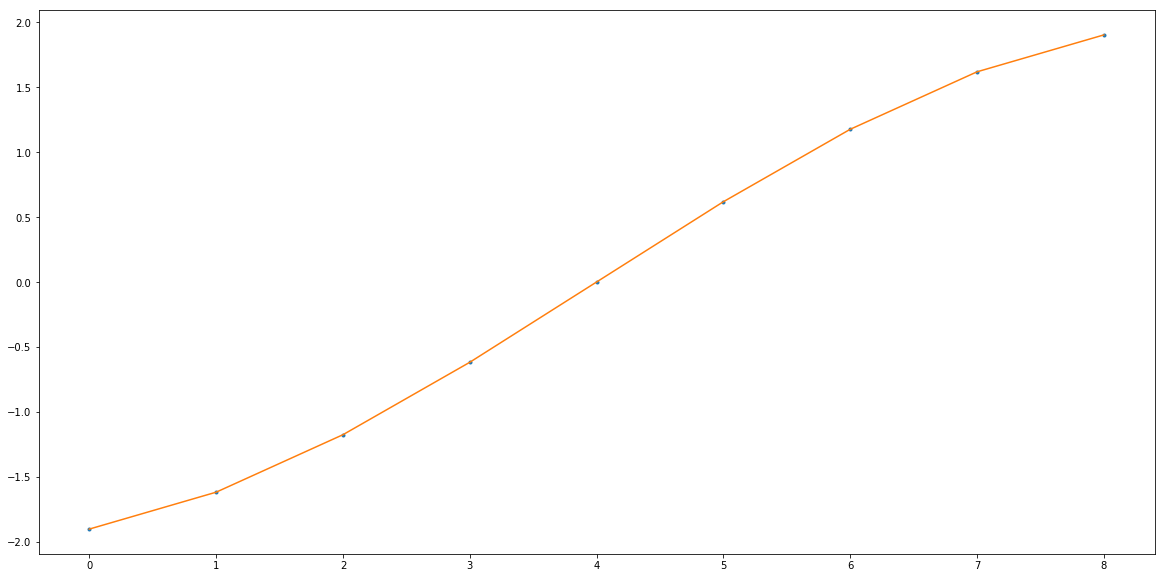

In [502]:
pp.figure(figsize=(20,10))
pp.plot(eV2,'.')
gp=(N-1)/(N+1.)
pp.plot([-2*np.cos(((vv-(N-1)/2.)*gp*np.pi/(N-1))+np.pi/2.) for vv in range(N)])

In [417]:
NJarray=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100]
gparray=[1./3,1./2,]

1.0459770114942528

In [492]:
gp

0

In [465]:
(1+np.sqrt(5))/2

1.618033988749895

In [267]:
N=30
def offdiag(i,j): 
    if abs(i-j)==1: 
        return 1
    else:
        return 0
mattd=Matrix(N,N,offdiag)

In [211]:
mattd.eigenvals()

{-sqrt(3*sqrt(5)/8 + 15/8) - sqrt(5)/4 + 1/4: 1,
 -sqrt(-3*sqrt(5)/8 + 15/8) - sqrt(5)/4 - 1/4: 1,
 -sqrt(5)/2 - 1/2: 1,
 -sqrt(3*sqrt(5)/8 + 15/8) - 1/4 + sqrt(5)/4: 1,
 -1: 1,
 -sqrt(5)/2 + 1/2: 1,
 -sqrt(-3*sqrt(5)/8 + 15/8) + 1/4 + sqrt(5)/4: 1,
 -sqrt(5)/4 - 1/4 + sqrt(-3*sqrt(5)/8 + 15/8): 1,
 -1/2 + sqrt(5)/2: 1,
 1: 1,
 -sqrt(5)/4 + 1/4 + sqrt(3*sqrt(5)/8 + 15/8): 1,
 1/2 + sqrt(5)/2: 1,
 1/4 + sqrt(5)/4 + sqrt(-3*sqrt(5)/8 + 15/8): 1,
 -1/4 + sqrt(5)/4 + sqrt(3*sqrt(5)/8 + 15/8): 1}

In [242]:
listeV=[sympy.N(-sqrt(3*sqrt(5)/8 + 15/8.) - sqrt(5)/4 + 1/4.),sympy.N(-sqrt(-3*sqrt(5)/8 + 15/8.) - sqrt(5)/4 - 1/4.),\
       sympy.N(-sqrt(5)/2 - 1/2.),sympy.N(-sqrt(3*sqrt(5)/8 + 15/8.) - 1/4. + sqrt(5)/4),-1.,sympy.N(-sqrt(5)/2 + 1/2.),\
       sympy.N(-sqrt(-3*sqrt(5)/8 + 15/8.) + 1/4. + sqrt(5)/4)]

In [243]:
listeV

[-1.95629520146761,
 -1.82709091528520,
 -1.61803398874989,
 -1.33826121271772,
 -1.0,
 -0.618033988749895,
 -0.209056926535307]

In [ ]:
B=symbols('B')
(mattd-B*eye(N)).det()

In [269]:
B=symbols('B')
mattd.charpoly(B)

PurePoly(B**30 - 29*B**28 + 378*B**26 - 2925*B**24 + 14950*B**22 - 53130*B**20 + 134596*B**18 - 245157*B**16 + 319770*B**14 - 293930*B**12 + 184756*B**10 - 75582*B**8 + 18564*B**6 - 2380*B**4 + 120*B**2 - 1, B, domain='ZZ')

In [239]:
mattd

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

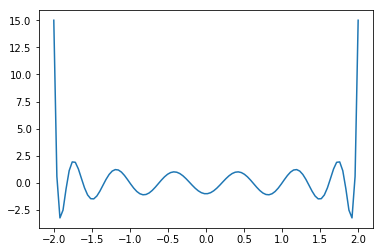

In [241]:
Barray=np.linspace(-2,2,100)
Bdet=[B**14 - 13*B**12 + 66*B**10 - 165*B**8 + 210*B**6 - 126*B**4 + 28*B**2 - 1 for B in Barray]
pp.plot(Barray,Bdet)

In [256]:
listeV2=sorted([0,-1,-np.sqrt(2),-np.sqrt(3),-np.sqrt(2+np.sqrt(3)),-np.sqrt(2-np.sqrt(3))])

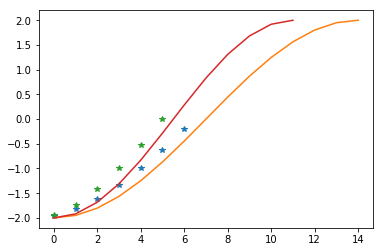

In [275]:
pp.plot(listeV,'*')
pp.plot([-2*np.cos((vv)*np.pi/14) for vv in range(14+1)])
pp.plot(listeV2,'*')
pp.plot([-2*np.cos((vv)*np.pi/11) for vv in range(11+1)])

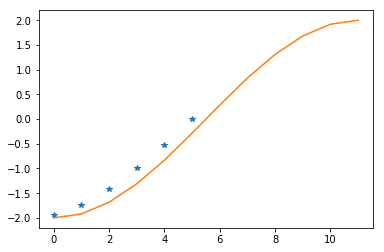

In [265]:
pp.plot(listeV2,'*')
pp.plot([-2*np.cos((vv)*np.pi/11) for vv in range(11+1)])

In [451]:
newlink=Matrix([[B+mu,tp,0,0],[tp,0,Del,0],[0,Dels,0,-tp],[0,0,-tp,B-mu]])

In [452]:
newlink.eigenvals()

{Piecewise((B/2 + sqrt(B**2/3 + 2*D*Ds/3 + 2*m**2/3 + 4*tp**2/3 - 2*(-(2*B*D*Ds + 2*B*tp**2 - 2*B*(D*Ds/2 + m**2/2 + tp**2))**2/8 - (-B**2/2 - D*Ds - m**2 - 2*tp**2)**3/108 + (-B**2/2 - D*Ds - m**2 - 2*tp**2)*(-B**2*D*Ds + 2*B*(B*D*Ds/2 + B*tp**2/2 - 2*B*(-B**2/64 + D*Ds/16 + m**2/16 + tp**2/8)) + D*Ds*m**2 + tp**4)/3)**(1/3))/2 + sqrt(2*B**2/3 + 4*D*Ds/3 + 4*m**2/3 + 8*tp**2/3 - (4*B*D*Ds + 4*B*tp**2 - 4*B*(D*Ds/2 + m**2/2 + tp**2))/sqrt(B**2/3 + 2*D*Ds/3 + 2*m**2/3 + 4*tp**2/3 - 2*(-(2*B*D*Ds + 2*B*tp**2 - 2*B*(D*Ds/2 + m**2/2 + tp**2))**2/8 - (-B**2/2 - D*Ds - m**2 - 2*tp**2)**3/108 + (-B**2/2 - D*Ds - m**2 - 2*tp**2)*(-B**2*D*Ds + 2*B*(B*D*Ds/2 + B*tp**2/2 - 2*B*(-B**2/64 + D*Ds/16 + m**2/16 + tp**2/8)) + D*Ds*m**2 + tp**4)/3)**(1/3)) + 2*(-(2*B*D*Ds + 2*B*tp**2 - 2*B*(D*Ds/2 + m**2/2 + tp**2))**2/8 - (-B**2/2 - D*Ds - m**2 - 2*tp**2)**3/108 + (-B**2/2 - D*Ds - m**2 - 2*tp**2)*(-B**2*D*Ds + 2*B*(B*D*Ds/2 + B*tp**2/2 - 2*B*(-B**2/64 + D*Ds/16 + m**2/16 + tp**2/8)) + D*Ds*m**2 + tp**

In [765]:
mu=10.
B=1.5
W=np.pi
m=.5
def Gsum(x,xp,E):
    nmax=1000
    summ=0
    for n in range(1,nmax):
        kn=np.pi*n/W
        en=kn**2/2/m-mu+B
        summ+=(-1/W)*(np.cos(kn*(x+xp-W))-np.cos(kn*(x-xp)))/(E-en)
    return summ

In [766]:
ecart=0.0001
Gsum(0,0,1-ecart)

1.2498438283759132

In [796]:
En=0.6
xp=0.5

xarray=np.linspace(-W/2,W/2,200)
Gsumarray=[Gsum(x,xp,En) for x in xarray]

kE=np.sqrt(2*m*(En+mu-B))
Ganalarray=[np.exp(1j*kE*abs(x-xp))-np.exp(1j*kE*(x+xp+W))+\
            1j*np.exp(1j*kE*W)/np.sin(kE*W)*(np.cos(kE*abs(x-xp))-np.cos(kE*(x+xp+W))) for x in xarray]
Gaa=np.asarray([-1j*x*m/kE for x in Ganalarray])
tol=10**-10
Gaa.real[abs(Gaa.real)<tol]=0.
Gaa.imag[abs(Gaa.imag)<tol]=0.

diff=[Gsumarray[p]-Gaa[p] for p in range(len(xarray))]

In [ ]:
x=xarray[1]
Gaa

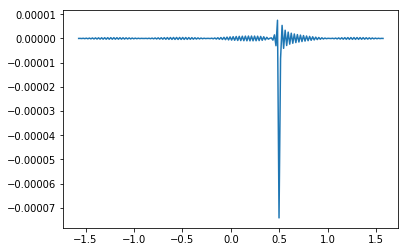

In [797]:
#pp.plot(xarray,Gsumarray)
#pp.plot(xarray,Ganalarray)
#pp.plot(xarray,Gaa)
pp.plot(xarray,diff)

In [724]:
def cot(x):
    return 1/np.tan(x)

In [731]:
contlim=[1-np.sqrt(2)*cot(np.sqrt(2)*n) for n in range(1,10)]

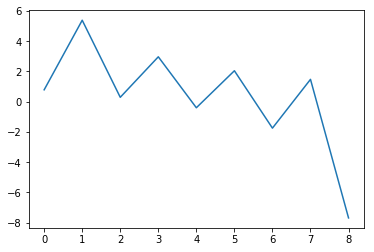

In [732]:
pp.plot(contlim)

In [844]:
ret=[[i,i+1,i+2] for i in range(1,5)]

In [845]:
ret2=np.ndarray.tolist(np.asarray(ret).reshape(1,12)[0])

In [846]:
ret2

[1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6]

In [842]:
ret

[(1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6)]

In [11]:
ter=[[1,2,3],[4,5]]

In [12]:
ter[1]

[4, 5]

In [13]:
ter[1]=[2,3,9]

In [18]:
ter.extend([[2,3]])

In [22]:
ter[0:1]

[[1, 2, 3]]

In [20]:
ter

[[1, 2, 3], [2, 3, 9], 2, 3, [2, 3]]

In [15]:
from scipy import sparse as sp
from scipy.sparse import coo_matrix as cmm

In [26]:
def mmat(n,m):
    return [[n*2.,n*1.+m*1.],[n*1.+m*1.,m*2.]]
totmmat=[[mmat(n,m) for n in range(2)] for m in range(2)]

In [23]:
newmat=sp.hstack([cmm(mmat(n,0)) for n in range(2)])
for m in range(1,2):
    newline=sp.hstack([cmm(mmat(n,m)) for n in range(2)])
    newmat=sp.vstack([newmat,newline])

In [29]:
np.asarray(totmmat)

array([[[[0., 0.],
         [0., 0.]],

        [[2., 1.],
         [1., 0.]]],


       [[[0., 1.],
         [1., 2.]],

        [[2., 2.],
         [2., 2.]]]])

In [25]:
newmat.toarray()

array([[0., 0., 2., 1.],
       [0., 0., 1., 0.],
       [0., 1., 2., 2.],
       [1., 2., 2., 2.]])

Text(0,0.5,'$det$')

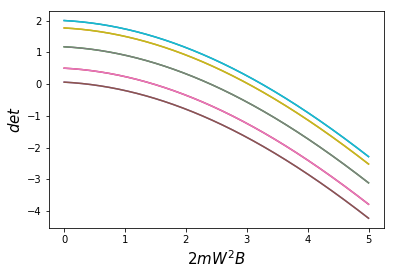

In [9]:
Barray=np.linspace(0,5,500)
detarray=[[np.cosh(np.sqrt(x))*np.cos(np.sqrt(x))-0.1*np.sinh(np.sqrt(x))*np.sin(np.sqrt(x))+np.cos(phi) for x in Barray] \
          for phi in np.linspace(0,2*np.pi,10)]
pp.figure()
for i in range(len(detarray)):
    pp.plot(Barray,detarray[i])
pp.xlabel('$2mW^2B$',fontsize=15)
pp.ylabel('$det$',fontsize=15)

In [55]:
epss=0.1 #epss=\mu*2mW^2
def detscat(x):
    return np.cosh(np.sqrt(x))*np.cos(np.sqrt(x))-epss/x*np.sinh(np.sqrt(x))*np.sin(np.sqrt(x))+np.cos(phi)

In [56]:
phiarray=np.linspace(0,2*np.pi,10000)
Barray=[]
nn=1
thstar=np.pi/2+nn*np.pi
Bstar=thstar**2
for phi in phiarray:
    soldet=opt.fsolve(detscat,Bstar)
    Barray.extend([soldet])
Bdev=[Bstar*(1-2*epss/thstar**3+(-1)**nn*4*np.exp(-thstar)/thstar*np.cos(pphi)) for pphi in phiarray]
Bdiff=[Barray[i]-Bdev[i] for i in range(len(Barray))]

Text(0,0.5,'$\\phi$')

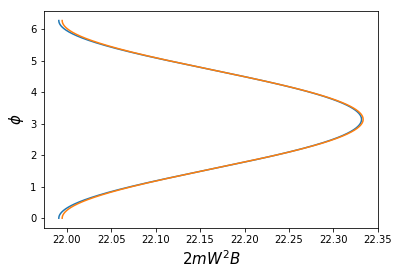

In [57]:
pp.plot(Barray,phiarray)
pp.plot(Bdev,phiarray)
#pp.axis([0,0.2,2.9,3.4])
pp.xlabel('$2mW^2B$',fontsize=15)
pp.ylabel('$\phi$',fontsize=15)

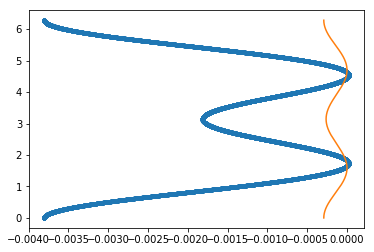

In [58]:
pp.plot(Bdiff,phiarray,'.')
pp.plot([-0.00029*(np.cos(ppp)**2-0.1*np.sin(ppp/2)**8) for ppp in phiarray],phiarray)

In [190]:
nn=0
print(np.pi**2/4*(1+2*nn)**2)
print(np.pi/2*(1+2*nn))
print(np.exp(-np.pi/2*(1+2*nn)))

2.46740110027
1.57079632679
0.20787957635076193


In [104]:
phi=1.9*np.pi
Blist=np.linspace(0.01,1000,1000)
detlist=[detscat(x) for x in Blist]

[0, 1000, -1, 1]

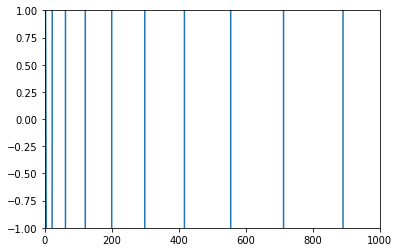

In [105]:
pp.plot(Blist,detlist)
pp.axis([0,1000,-1,1])